# DBSCAN

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [2]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)


In [3]:
X_m ,y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
    )

## Visualización de datos

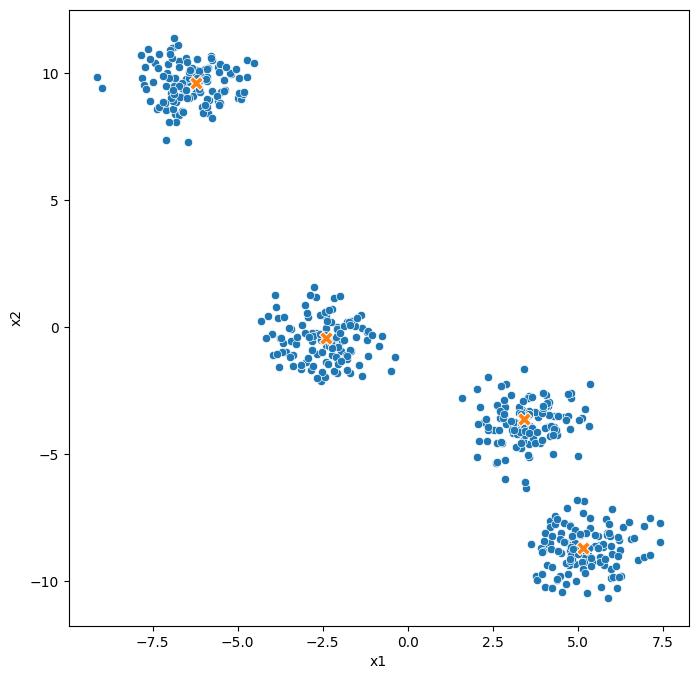

In [4]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s = 100)
plt.plot()
plt.show()

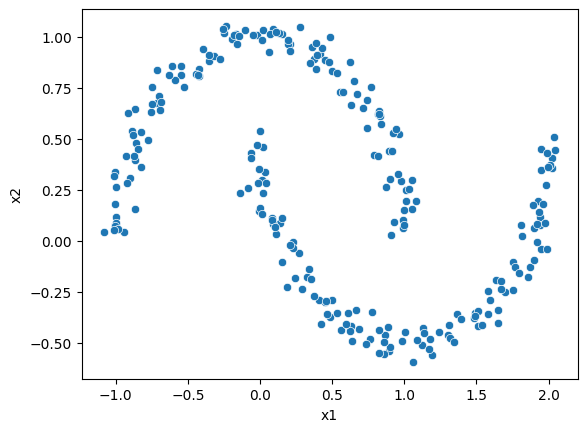

In [5]:
# Data agrupada con un patron relativamente reconocible
sns.scatterplot(data=df_moons, x='x1',y='x2')
plt.show()

## Implementando DBSCAN

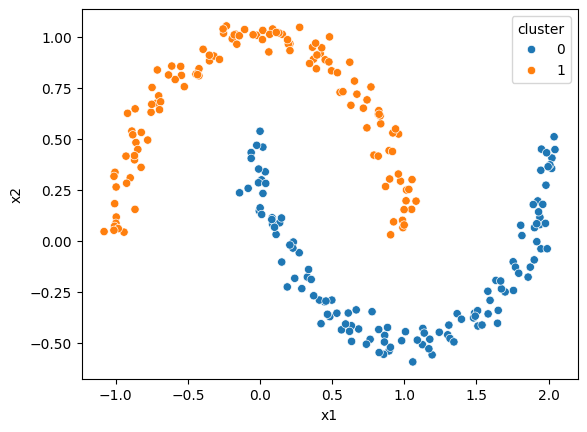

In [6]:
dbscan_cluster = DBSCAN(eps=0.3,        # Parametro epsilon
                        min_samples=3)  # minima cantidad de vecinos

y_m_predict = dbscan_cluster.fit_predict(X_m)

df_moons['cluster'] = y_m_predict

sns.scatterplot(data=df_moons, x='x1',y='x2', hue='cluster')
plt.show()

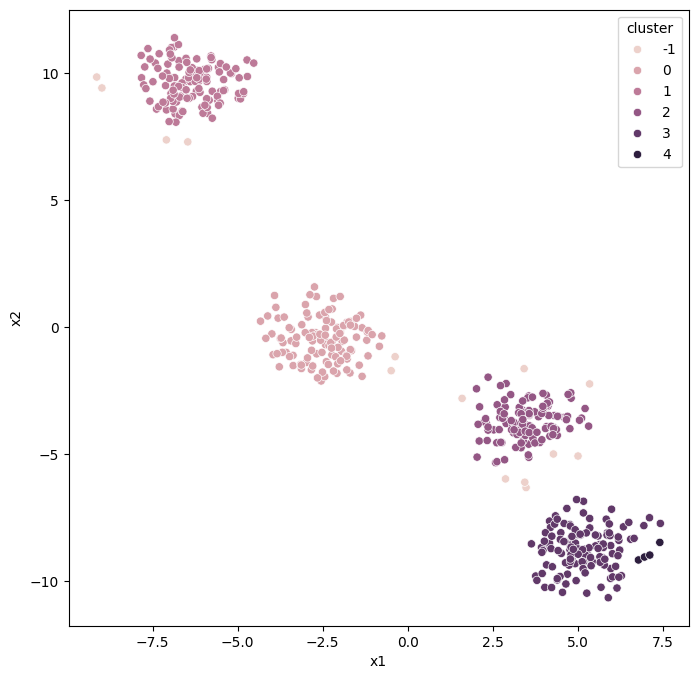

In [7]:
dbscan = DBSCAN(eps=0.6, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict 

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()


## Hyperparameters

In [8]:

from sklearn.neighbors import NearestNeighbors

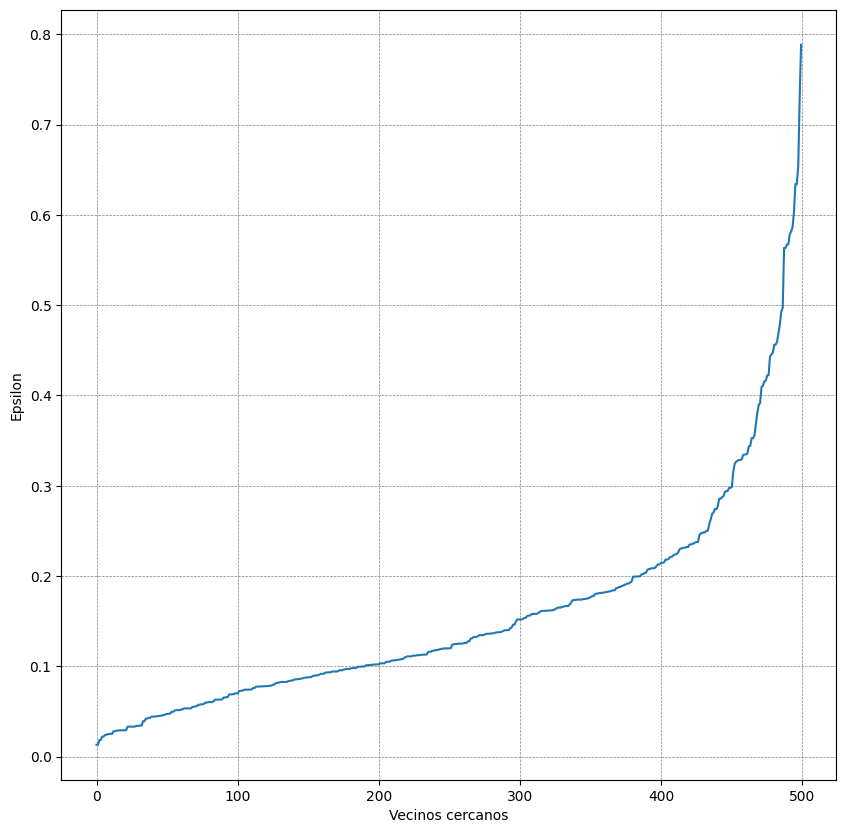

In [9]:
# Creamos una instancia del modelo
neighbors = NearestNeighbors(n_neighbors=4)

# Ajustamos el modelo a los datos
neighbors_fit = neighbors.fit(X)

# Buscamos los vecinos mas cercanos
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances,axis=0)


distances = distances[:,1]   # Valor del vecino mas cercano (segunda columna de la matriz de distancias)

fig = plt.figure(figsize=(10,10))
plt.plot(distances)
plt.xlabel('Vecinos cercanos')
plt.ylabel('Epsilon') 


# Cuadrícula personalizada
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.show()



In [10]:
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

def heatmap_eps_neighbors(X, eps_values:list[float], min_samples:list[int]= None):

    """
    Muestra un heatmap enfocado en el mejor coeficiente de silueta para un valor de epsilon y n_vecinos cercanos

    Parameters: 
    - X: data para clustering
    - eps_values:list[float]: rango o valores de epsilon que deseamos testear
    - min_samples:list[int]: cantidad de vecinos que queremos tomar para cada epsilon (por defecto np.arange(2,10))


    Return:
    Heatmap     
    """



    if min_samples is None:
        min_samples = np.arange(2,10)   # Por defecto

    # Creamos una lista que contiene pares (epsilon, k_vecinos_cercanos)
    dbscan_paramns = list(product(eps_values,min_samples))

    sil_scores = []     # Almacenamos los coeficientes de silueta para cada par de parametros a testear

    # Obtencion de los coeficientes de silueta para el rango de epsilon
    for p in dbscan_paramns: 
        y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
        sil_scores.append(silhouette_score(X,y_pred))

    # Convertimos el par de parametros de testeo en un DataFrame
    df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])

    # Agregamos los coeficientes de silueta correspondientes al par de hiperparametros
    df_paramns_tunning['sil_scores'] = sil_scores

    # Pivotamos el dataframe
    pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',
                            index='Min_Samples',
                            columns='Eps')

    # Visualizamos los datos con un heatmap que nos ayude a identificar que valores son los mas eficientes 
    fig, ax  = plt.subplots(figsize =(18,6))
    sns.heatmap(pivot_data, annot=True, annot_kws={'size':14}, cmap='coolwarm', ax = ax)
    plt.show()


In [11]:
# Rango de valores de epsilon
eps_values = np.arange(0.25, 0.5, 0.05) 

# Minimo de vecinos cercanos
min_samples = np.arange(2,10)

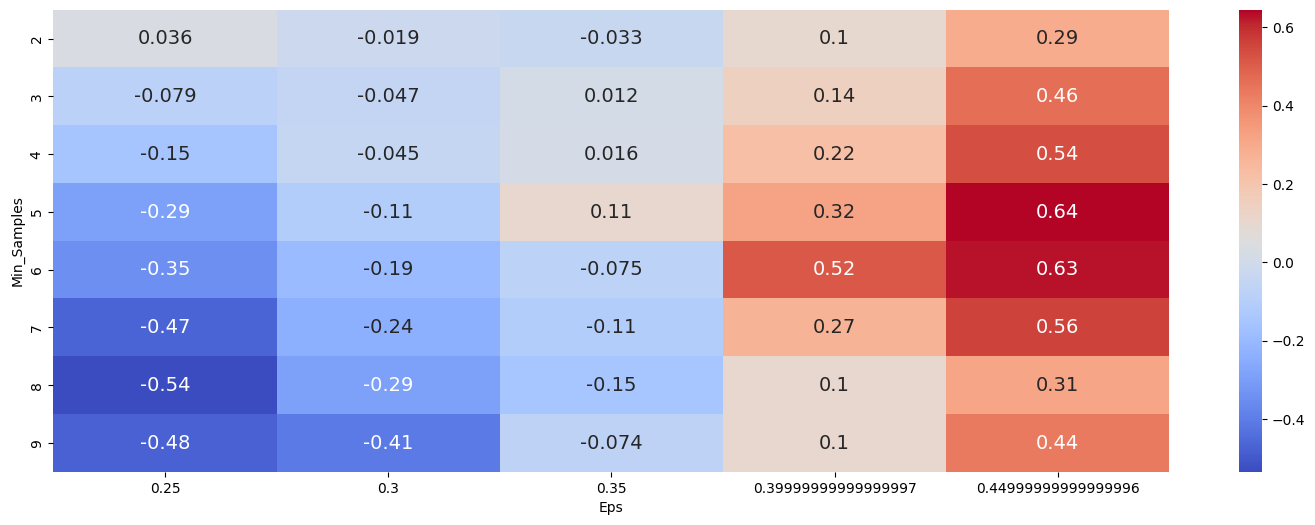

In [12]:
heatmap_eps_neighbors(X, eps_values)

In [13]:
from itertools import product

In [14]:
# Creamos una lista que contiene pares (epsilon, k_vecinos_cercanos)
dbscan_paramns = list(product(eps_values,min_samples))

sil_scores = []     # Almacenamos los coeficientes de silueta para cada par de parametros a testear

for p in dbscan_paramns: 
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_pred))


In [15]:
# Convertimos el par de parametros de testeo en un DataFrame
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])

# Agregamos los coeficientes de silueta correspondientes al par de hiperparametros
df_paramns_tunning['sil_scores'] = sil_scores


In [16]:
# Pivotamos el dataframe
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',
                            index='Min_Samples',
                            columns='Eps')
pivot_data

Eps,0.25,0.30,0.35,0.40,0.45
Min_Samples,,,,,
2,0.036200,-0.018884,-0.033252,0.100304,0.290975
3,-0.078807,-0.046957,0.011512,0.142811,0.461444
4,-0.153252,-0.045143,0.015810,0.222045,0.535055
5,-0.293587,-0.110600,0.105038,0.321456,0.644962
6,-0.348999,-0.194052,-0.074595,0.515667,0.626584
7,-0.469620,-0.243353,-0.109706,0.270665,0.557688
8,-0.535050,-0.294804,-0.150872,0.101298,0.313453
9,-0.476741,-0.407420,-0.073797,0.102299,0.436427


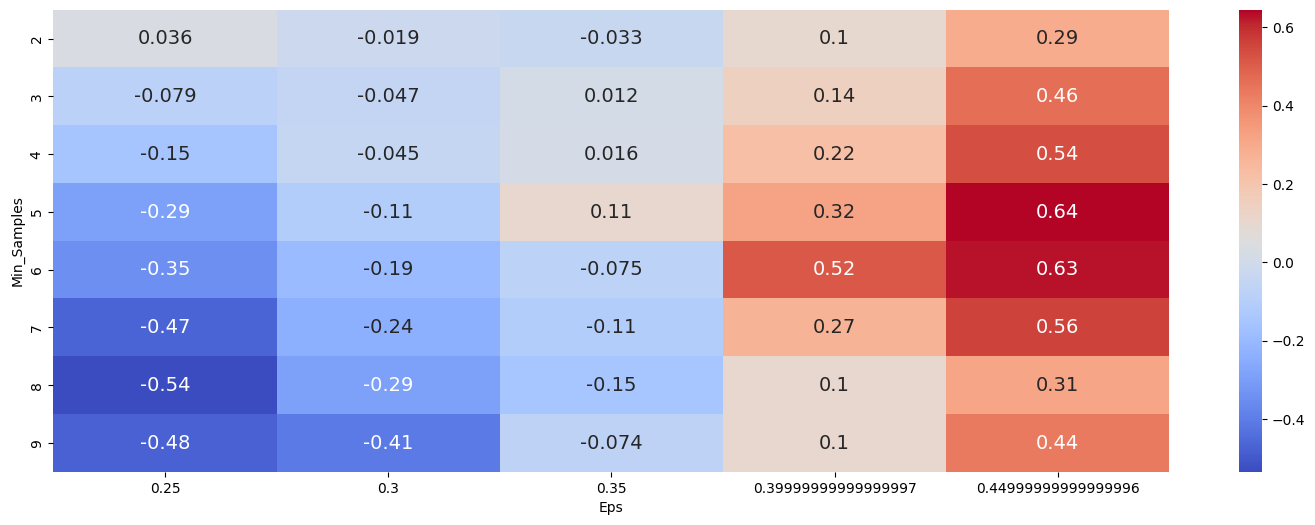

In [17]:
# Visualizamos los datos con un heatmap que nos ayude a identificar que valores son los mas eficientes 
fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':14}, cmap='coolwarm', ax = ax)
plt.show()

## Evaluación de DBSCAN

In [18]:
# Aplicamos los parametros epsilon y n_vecinos cercanos encontrados
dbscan_cluster = DBSCAN(eps=0.449, min_samples=5)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

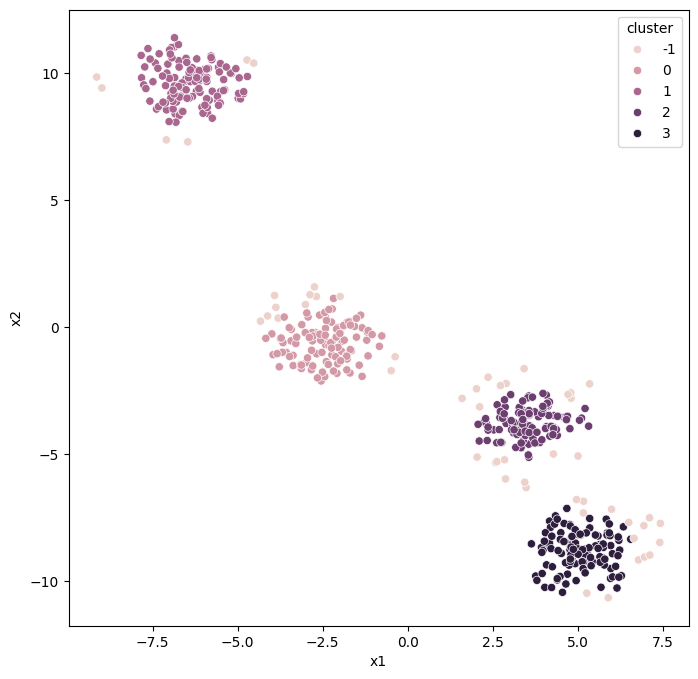

In [19]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def SilhouetteVisualizer_Model(X, eps:float, min_samples:int):

        
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    n_clusters = len(np.unique(cluster_labels))

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    plt.show()

For n_clusters = 5 The average silhouette_score is : 0.644961960446219


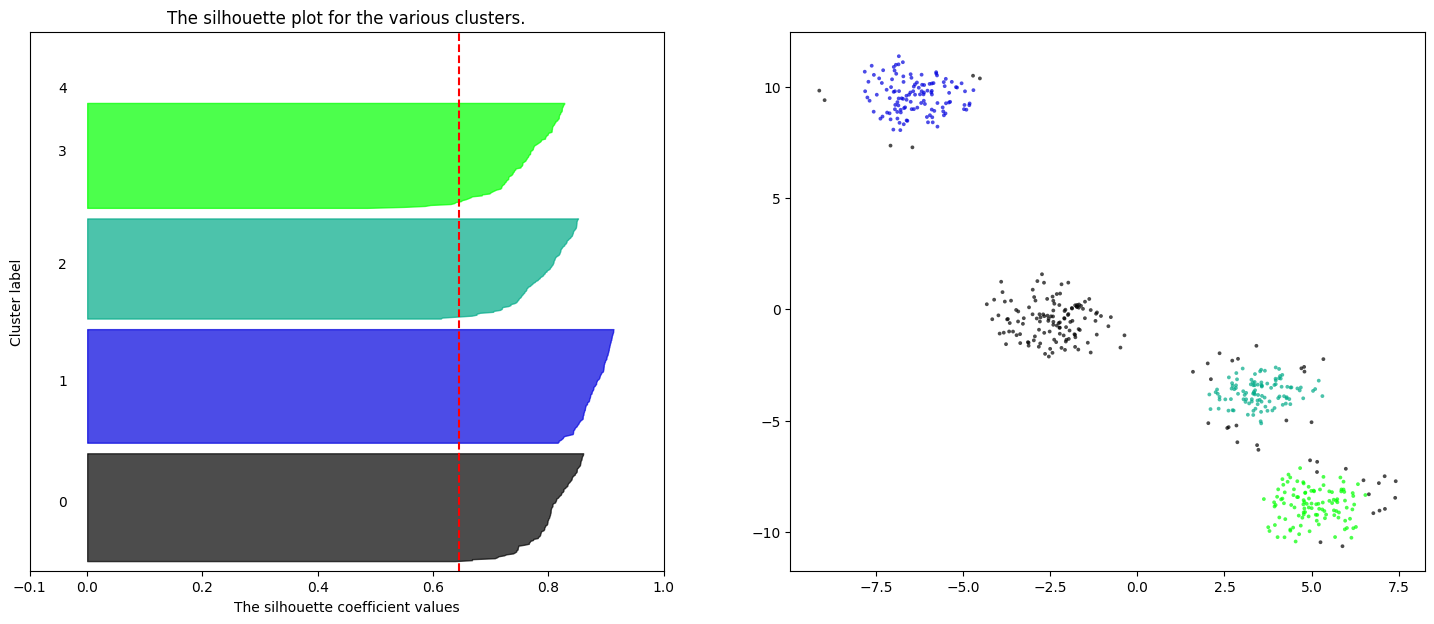

In [23]:
from tools_ml.eval_dbscan import SilhouetteVisualizer_Model
SilhouetteVisualizer_Model(X, 0.449,5)

For n_clusters = 5 The average silhouette_score is : 0.644961960446219


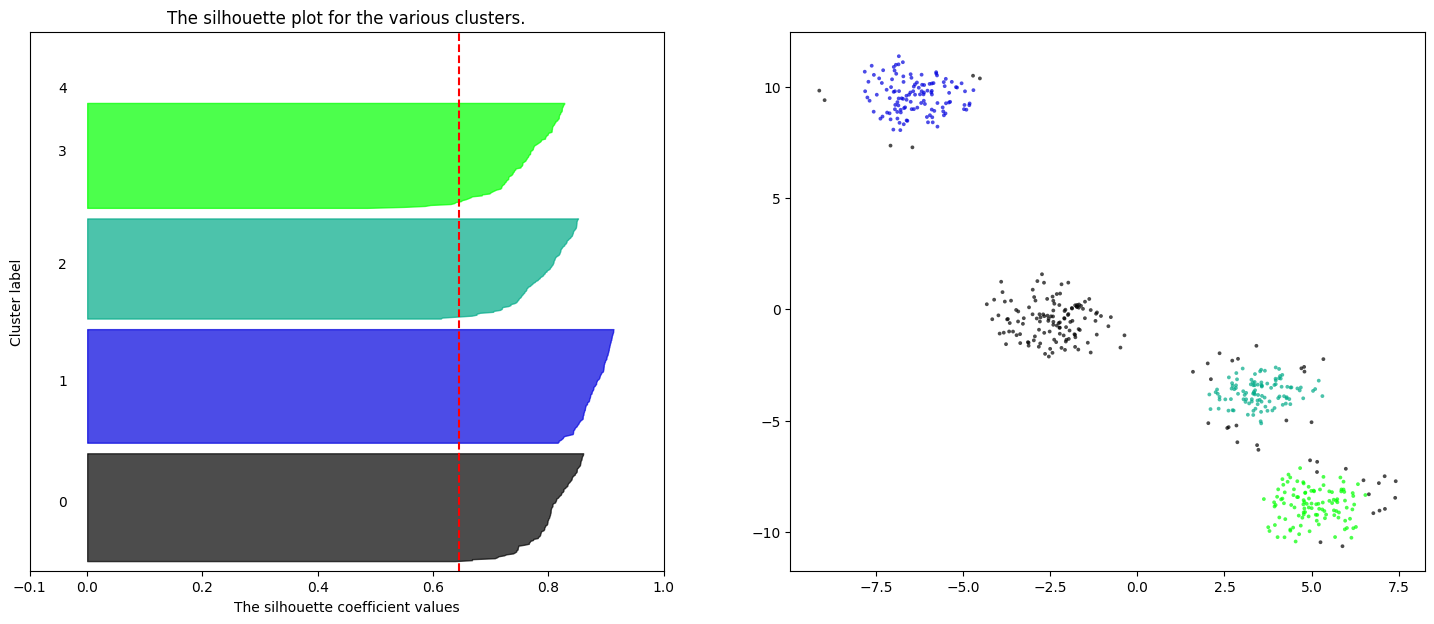

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.449, min_samples=5)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()